In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install textblob
import textblob as tb

In [69]:
data1.tail()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.
998,6960,johnson&johnson,Neutral,Johnson & Johnson to stop selling talc baby po...


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [71]:
data.describe()

,2401
count,74681.000000
mean,6432.640149
std,3740.423819
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [72]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [73]:
col_names=['ID','Entity','Sentiments','Contest']
df = pd.read_csv('twitter_training.csv',names=col_names)

In [74]:
df.head()

,ID,Entity,Sentiments,Contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [75]:
df.shape

(74682, 4)

In [76]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiments  \
0      2401  Borderlands   Positive   
1      2401  Borderlands   Positive   
2      2401  Borderlands   Positive   
3      2401  Borderlands   Positive   
4      2401  Borderlands   Positive   
...     ...          ...        ...   
74677  9200       Nvidia   Positive   
74678  9200       Nvidia   Positive   
74679  9200       Nvidia   Positive   
74680  9200       Nvidia   Positive   
74681  9200       Nvidia   Positive   

                                                 Contest  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that

In [77]:
df.isnull().sum()

ID              0
Entity          0
Sentiments      0
Contest       686
dtype: int64

In [78]:
df.dropna(axis=0,inplace=True)

In [79]:
df.isnull().sum()

ID            0
Entity        0
Sentiments    0
Contest       0
dtype: int64

In [80]:
df.duplicated().sum()

2340

In [81]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [82]:
df.shape

(71656, 4)

In [83]:
sentiment_count=df['Sentiments'].value_counts()
sentiment_count

Sentiments
Negative      21698
Positive      19713
Neutral       17708
Irrelevant    12537
Name: count, dtype: int64

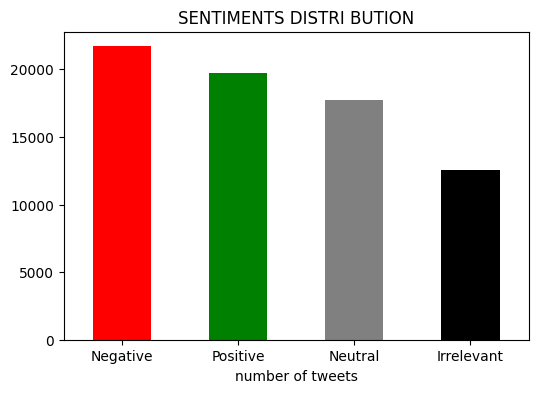

In [84]:
plt.figure(figsize=(6,4))
sentiment_count.plot(kind='bar',color=['red','green','grey','black'])
plt.title('SENTIMENTS DISTRI BUTION')
plt.xlabel('number of tweets')
plt.xticks(rotation=0)
plt.show()


Sentiment Proportions per Entity:
Sentiments                         Irrelevant  Negative   Neutral  Positive
Entity                                                                     
Amazon                               0.082259  0.251223  0.532237  0.134282
ApexLegends                          0.081212  0.251975  0.400790  0.266023
AssassinsCreed                       0.118738  0.169295  0.070965  0.641002
Battlefield                          0.402217  0.197339  0.151663  0.248780
Borderlands                          0.107888  0.188123  0.263373  0.440617
CS-GO                                0.282460  0.152620  0.238269  0.326651
CallOfDuty                           0.285220  0.372083  0.158600  0.184097
CallOfDutyBlackopsColdWar            0.243087  0.240856  0.151650  0.364407
Cyberpunk2077                        0.210115  0.165517  0.209655  0.414713
Dota2                                0.180225  0.316854  0.260225  0.242697
FIFA                                 0.240393  0.5035

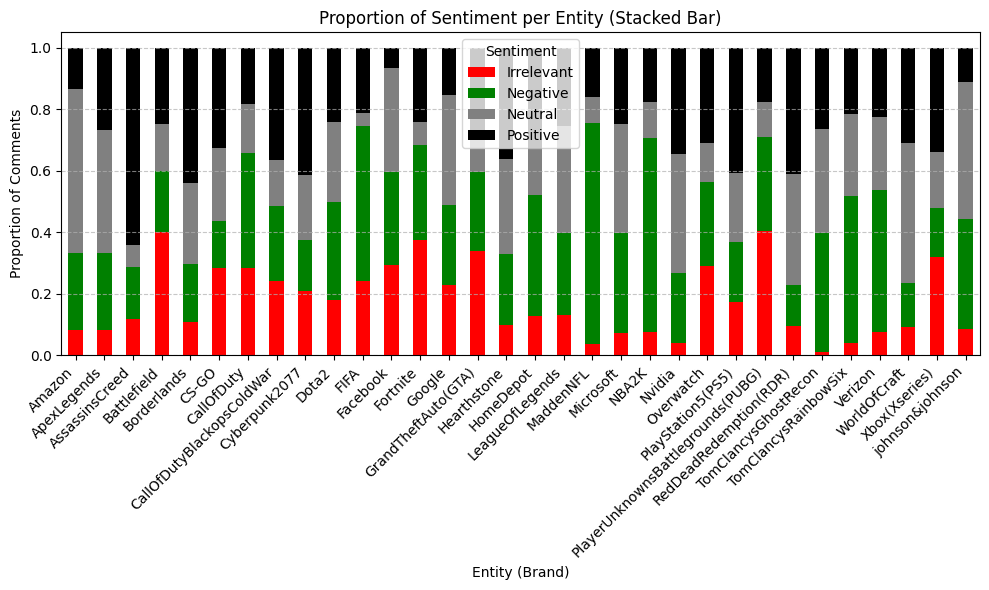

In [85]:
sentiment_by_entity_prop = df.groupby('Entity')['Sentiments'].value_counts(normalize=True).unstack().fillna(0)
print("\nSentiment Proportions per Entity:")
print(sentiment_by_entity_prop)

sentiment_by_entity_prop.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red','green','grey','black'])
plt.title('Proportion of Sentiment per Entity (Stacked Bar)')
plt.xlabel('Entity (Brand)')
plt.ylabel('Proportion of Comments')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [86]:
# --- Find Top 3 Brands for Positive Engagement ---
positive_engagement_df = df[df['Sentiments'] == 'Positive']
top_3_positive_brands = positive_engagement_df['Entity'].value_counts().head(3)

# --- Find Top 3 Brands for Negative Engagement ---
negative_engagement_df = df[df['Sentiments'] == 'Negative']
top_3_negative_brands = negative_engagement_df['Entity'].value_counts().head(3)

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_1384\1972799692.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_positive_brands.index, y=top_3_positive_brands.values, palette='Greens_d')


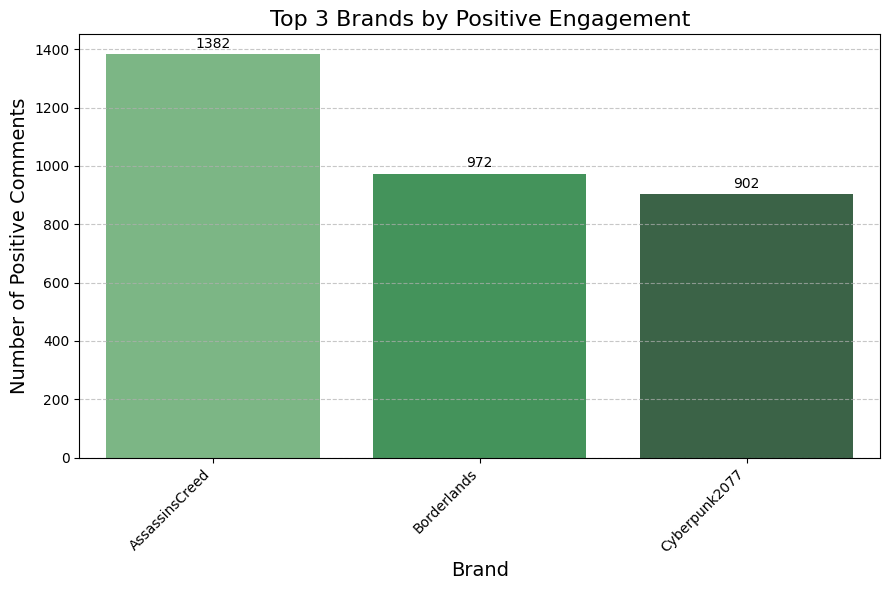

In [87]:
plt.figure(figsize=(9, 6))
sns.barplot(x=top_3_positive_brands.index, y=top_3_positive_brands.values, palette='Greens_d')
plt.title('Top 3 Brands by Positive Engagement', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Number of Positive Comments', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax_pos = plt.gca() 
for p in ax_pos.patches:
    height = p.get_height()
    if height > 0:
        ax_pos.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='baseline', xytext=(0, 5), textcoords='offset points',
                        fontsize=10, color='black')
plt.tight_layout()
plt.show()

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_1384\306318259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_3_negative_brands.index, y=top_3_negative_brands.values, palette='Reds_d')


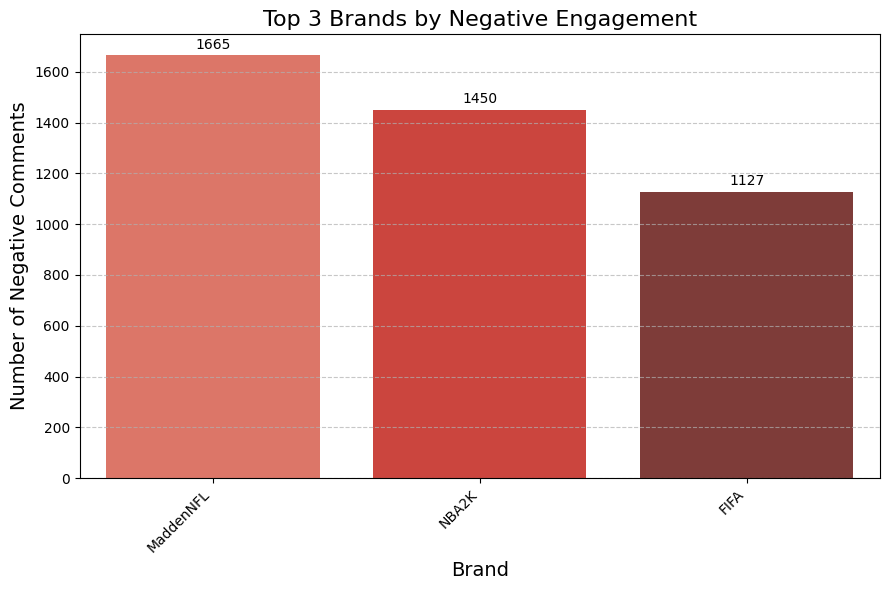

In [88]:
plt.figure(figsize=(9, 6))
sns.barplot(x=top_3_negative_brands.index, y=top_3_negative_brands.values, palette='Reds_d') 
plt.title('Top 3 Brands by Negative Engagement', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Number of Negative Comments', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax_neg = plt.gca() 
for p in ax_neg.patches:
    height = p.get_height()
    if height > 0:
        ax_neg.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='baseline', xytext=(0, 5), textcoords='offset points',
                        fontsize=10, color='black')

plt.tight_layout()
plt.show()